
# Demo: lottery + salary

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'].insert(0, 'Noto Sans CJK TC')

## Lottery dataset

In [5]:
lottery = pd.read_csv("http://bit.ly/lottery-wide")
lottery.head()

,Date,X1,X2,X3,X4,X5,X6,S
0,105/08/12,8,35,43,33,20,42,10
1,105/08/09,15,37,35,17,45,30,41
2,105/08/05,27,40,2,35,22,1,33
3,105/08/02,15,4,20,22,28,29,1
4,105/07/29,28,9,27,15,30,41,13


In [6]:
def to_date(x):
    x_list = x.split('/')
    x_list[0] = str(int(x_list[0]) + 1911)
    return pd.to_datetime('-'.join(x_list))

In [7]:
lottery['Date'] = lottery['Date'].map(to_date)
lottery.set_index('Date', inplace=True)
lottery.head()

,X1,X2,X3,X4,X5,X6,S
Date,,,,,,,
2016-08-12,8,35,43,33,20,42,10
2016-08-09,15,37,35,17,45,30,41
2016-08-05,27,40,2,35,22,1,33
2016-08-02,15,4,20,22,28,29,1
2016-07-29,28,9,27,15,30,41,13


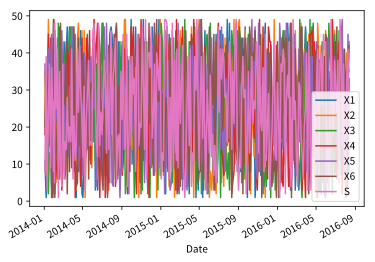

In [8]:
lottery.plot()

In [22]:
lotter_long = lottery.reset_index().melt(
    id_vars='Date',
    value_vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'S'],
    var_name='ball_type',
    value_name='ball_value'
)
lotter_long.head()

,Date,ball_type,ball_value
0,2016-08-12,X1,8
1,2016-08-09,X1,15
2,2016-08-05,X1,27
3,2016-08-02,X1,15
4,2016-07-29,X1,28


In [ ]:
lotter_long['ball_value'] = lotter_long['ball_value'].apply(lambda x: f'{x:02d}')

In [26]:
lotter_long.head()

,Date,ball_type,ball_value
0,2016-08-12,X1,08
1,2016-08-09,X1,15
2,2016-08-05,X1,27
3,2016-08-02,X1,15
4,2016-07-29,X1,28


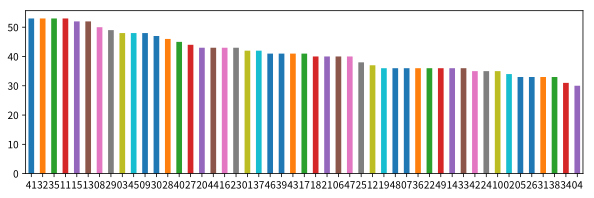

In [31]:
lotter_long['ball_value'].value_counts(sort=True).plot.bar(
    rot=0, figsize=(10, 3))

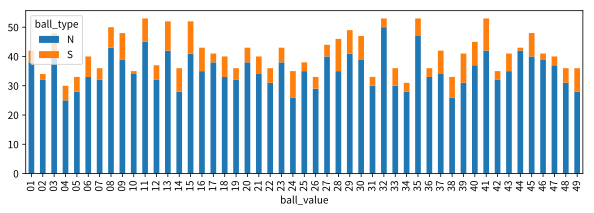

In [36]:
(
    lotter_long
    .assign(ball_type=np.where(lotter_long['ball_type'] == 'S', 'S', 'N'))
    .groupby('ball_type')['ball_value'].value_counts()
    .unstack('ball_type')
    .plot.bar(stacked=True, figsize=(10, 3))
)

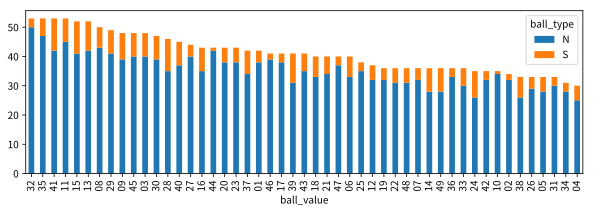

In [41]:
(
    lotter_long
    .assign(ball_type=np.where(lotter_long['ball_type'] == 'S', 'S', 'N'))
    .groupby('ball_type')['ball_value'].value_counts()
    .unstack('ball_type')
    .assign(total=lambda df: df.sum(axis=1))
    .sort_values('total', ascending=False)
    .drop('total', axis=1)
    .plot.bar(stacked=True, figsize=(10, 3))
)

## Salary dataset

In [42]:
salary = pd.read_csv('http://bit.ly/job-salary')
salary.head()

,company_id,crawlSessionId,tag,url,clusterNumber,companyCategory,location,title,type,currency,min_max,price
0,32416,2015122704,Software Engineer,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,max,180000.0
1,32416,2015122704,Software Engineer,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,min,100000.0
2,32416,2015122704,Java,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,max,180000.0
3,32416,2015122704,Java,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,min,100000.0
4,32416,2015122704,Hadoop,https://angel.co/sharethrough/jobs/15447-data-...,36,行動廣告,San Francisco,Data Engineer,Full Time,USD,max,180000.0


In [43]:
salary.currency.unique()

array(['USD', 'INR', 'GBP', 'EUR', 'YEN'], dtype=object)

In [48]:
salary_long = salary.pivot_table(
    index=['companyCategory', 'company_id', 'title', 'type', 
           'tag', 'location', 'currency'],
    columns='min_max',
    values='price'
)
salary_long.head()

min_max                                                                                                             max  \
companyCategory company_id title                           type      tag                   location  currency             
Bigdata         149        Director of Customer Engagement Full Time Consulting            Remote OK USD       180000.0   
                                                                     Management Consulting Remote OK USD       180000.0   
                                                                     New York City         Remote OK USD       180000.0   
                                                                     Pharmaceutical        Remote OK USD       180000.0   
                                                                     Product Manager       Remote OK USD       180000.0   

min_max                                                                                                             min  
companyCategory company_id title                           type      tag                   location  currency            
Bigdata         149        Director of Customer Engagement Full Time Consulting            Remote OK USD       160000.0  
                                                                     Management Consulting Remote OK USD       160000.0  
                                                                     New York City         Remote OK USD       160000.0  
                                                                     Pharmaceutical        Remote OK USD       160000.0  
                                                                     Product Manager       Remote OK USD       160000.0

In [57]:
jobs = (
    salary_long
    .reset_index(['company_id', 'companyCategory', 'title'])
    .drop_duplicates(['company_id', 'title'])
    .reset_index(drop=True)
)
jobs.head()

min_max,companyCategory,company_id,title,max,min
0,Bigdata,149,Director of Customer Engagement,180000.0,160000.0
1,Bigdata,149,Technical Sales Engineer,110000.0,100000.0
2,Bigdata,975,Backend Developer,65000.0,30000.0
3,Bigdata,975,Community Manager,40000.0,24000.0
4,Bigdata,975,Experienced Graphic Designer (London)- Work wi...,53000.0,38000.0


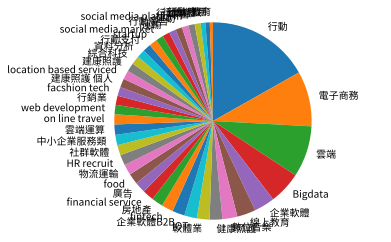

In [61]:
ax = (
    jobs['companyCategory']
    .value_counts(ascending=False)
    .plot.pie(counterclock=False, startangle=90)
)
ax.axis('equal');
ax.set_ylabel('');

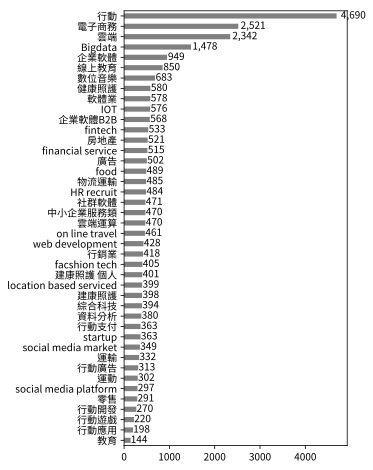

In [65]:
ax = (
    jobs['companyCategory']
    .value_counts(ascending=True)
    .plot.barh(figsize=(4, 8), color='grey')
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,}', (p.get_width() * 1.02, p.get_y()))

In [67]:
salary_long.head()

min_max                                                                                                             max  \
companyCategory company_id title                           type      tag                   location  currency             
Bigdata         149        Director of Customer Engagement Full Time Consulting            Remote OK USD       180000.0   
                                                                     Management Consulting Remote OK USD       180000.0   
                                                                     New York City         Remote OK USD       180000.0   
                                                                     Pharmaceutical        Remote OK USD       180000.0   
                                                                     Product Manager       Remote OK USD       180000.0   

min_max                                                                                                             min  
companyCategory company_id title                           type      tag                   location  currency            
Bigdata         149        Director of Customer Engagement Full Time Consulting            Remote OK USD       160000.0  
                                                                     Management Consulting Remote OK USD       160000.0  
                                                                     New York City         Remote OK USD       160000.0  
                                                                     Pharmaceutical        Remote OK USD       160000.0  
                                                                     Product Manager       Remote OK USD       160000.0

In [71]:
skills = salary_long.reset_index(['companyCategory', 'title', 'tag']).reset_index(drop=True)

In [72]:
skills.head()

min_max,companyCategory,title,tag,max,min
0,Bigdata,Director of Customer Engagement,Consulting,180000.0,160000.0
1,Bigdata,Director of Customer Engagement,Management Consulting,180000.0,160000.0
2,Bigdata,Director of Customer Engagement,New York City,180000.0,160000.0
3,Bigdata,Director of Customer Engagement,Pharmaceutical,180000.0,160000.0
4,Bigdata,Director of Customer Engagement,Product Manager,180000.0,160000.0


In [81]:
(
    skills
    .groupby(['tag', 'companyCategory'])
    .size()
    .unstack(fill_value=0)
    .loc[['Software Engineer', 'Marketing', 'Sales',
          'Javascript', 'Mobile Developer', 'Full-Stack Developer'], 
         ['行動', '電子商務', '雲端', 'Bigdata']]
    .style.background_gradient(cmap='summer')
)

companyCategory,行動,電子商務,雲端,Bigdata
tag,,,,
Software Engineer,979,471,465,410
Marketing,701,468,352,129
Sales,585,326,319,223
Javascript,644,314,278,277
Mobile Developer,606,246,190,66
Full-Stack Developer,535,323,260,175
